In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Create the environment
class GridWorld:
    def __init__(self, width, height, bomb_positions, gold_positions, wall_positions):
        self.width = width
        self.height = height
        self.bomb_positions = bomb_positions
        self.gold_positions = gold_positions
        self.wall_positions = wall_positions
        
    def is_valid(self, x, y):
        if (x, y) not in self.wall_positions and 0 <= x < self.width and 0 <= y < self.height:
            return True
        return False

    def step(self, position, action):
        x, y = position
        if action == 0:  # Up
            y -= 1
        elif action == 1:  # Down
            y += 1
        elif action == 2:  # Left
            x -= 1
        elif action == 3:  # Right
            x += 1

        if not self.is_valid(x, y):
            x, y = position

        reward = -1
        if position == (x, y):  # Penalize staying in one place
            reward = -5
        done = False
        if (x, y) in self.bomb_positions:
            reward = -100
            done = True
        elif (x, y) in self.gold_positions:
            reward = 100
            done = True

        return (x, y), reward, done

    def print_grid(self, position):
        for y in range(self.height):
            row = []
            for x in range(self.width):
                if (x, y) == position:
                    row.append('A')
                elif (x, y) in self.bomb_positions:
                    row.append('B')
                elif (x, y) in self.gold_positions:
                    row.append('G')
                elif (x, y) in self.wall_positions:
                    row.append('|')
                else:
                    row.append('.')
            print(''.join(row))
        print()

# Q-learning agent
class QLearningAgent:
    def __init__(self, actions, learning_rate=0.3, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.9995):
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.actions = actions
        self.q_table = {}

    def get_q(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def choose_action(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.choice(self.actions)
        else:
            q_values = [self.get_q(state, action) for action in self.actions]
            return self.actions[np.argmax(q_values)]

    def learn(self, old_state, reward, new_state, action):
        old_q = self.get_q(old_state, action)
        new_q = reward + self.discount_factor * np.max([self.get_q(new_state, a) for a in self.actions])
        self.q_table[(old_state, action)] = old_q + self.learning_rate * (new_q - old_q)
        self.exploration_rate *= self.exploration_decay

# Function for training and testing the agent
def play(environment, agent, trials=500, max_steps_per_episode=1000, learn=False):
    reward_per_episode = [] 
    for trial in range(trials):
        cumulative_reward = 0
        step = 0
        game_over = False
        state = (0, 0)
        while step < max_steps_per_episode and not game_over:
            action = agent.choose_action(state)
            new_state, reward, done = environment.step(state, action)

            if learn:
                agent.learn(state, reward, new_state, action)

            cumulative_reward += reward
            step += 1
            state = new_state

            if done:
                environment.__init__(environment.width, environment.height, environment.bomb_positions, environment.gold_positions, environment.wall_positions)
                game_over = True
        reward_per_episode.append(cumulative_reward)
    return reward_per_episode


[-115, -100, -100, -118, -115, -100, -102, -106, -107, -100, -101, -102, -100, -115, -107, -100, -100, -100, -101, -101, -107, -102, -100, -136, -120, -101, -115, -115, -144, -124, -107, -102, -110, -105, -147, -118, -105, -124, -108, -100, -105, -105, -100, -221, -110, -110, -114, -118, -129, -100, -120, -106, -101, -121, -100, -100, -112, -114, -115, -117, -117, -100, -130, -100, -100, -119, -100, -116, -100, -100, -138, -116, -103, -115, -100, -107, -110, -138, -101, -115, -108, -105, -100, -101, -105, -100, -107, -106, -101, -105, -126, -100, -149, -105, -116, -100, -109, -100, -103, -112, -100, -100, -109, -100, -105, -108, -113, -100, -136, -102, -102, -100, -100, -111, -105, -117, -114, -101, -112, -136, -133, -108, -127, -126, -317, -118, -725, -111, -169, -101, -106, -979, -145, -105, -120, -206, -169, -121, -417, -100, -103, -102, -251, -1056, -210, -436, -101, -305, -593, -929, -153, -78, -296, -103, -241, -1008, -674, -2, -451, -81, -812, -468, -254, -33, -706, -221, -831, 

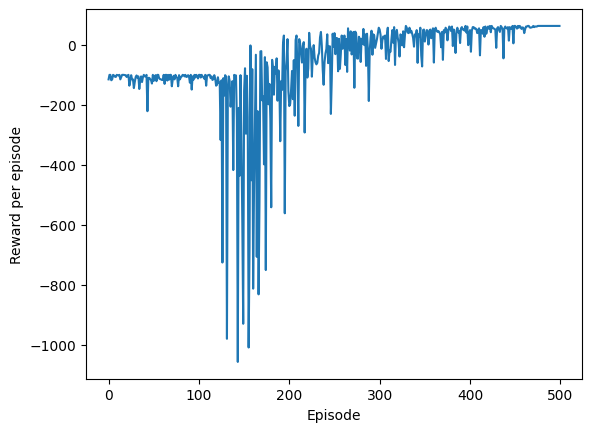

In [27]:
# Set up the environment and Q-learning parameters
width, height = 20, 20
bomb_positions = [(1,1),(1,0),(1,2),(1,3),(1,4),(1,5),(10, 10), (12, 12)]
gold_positions = [(19, 19)]
wall_positions = [(11, 11)]

env = GridWorld(width, height, bomb_positions, gold_positions, wall_positions)
q_learning_agent = QLearningAgent([0, 1, 2, 3])

reward_per_episode = play(env, q_learning_agent, trials=500, learn=True)
print(reward_per_episode)
# Simple learning curve
plt.plot(reward_per_episode)
plt.xlabel("Episode")
plt.ylabel("Reward per episode")
plt.show()
